In [3]:
pip install pyaf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 13.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [5]:
stock = 'CCL' # input
start = '2015-01-01' # input 
end = '2022-08-04'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,45.910000,46.110001,45.310001,45.610001,38.915909,2769700
2015-01-05,46.180000,46.200001,45.299999,45.389999,38.728195,4301500
2015-01-06,45.630001,46.169998,45.020000,45.830002,39.103619,6216100
2015-01-07,45.889999,46.290001,45.740002,46.000000,39.248669,7102600
2015-01-08,46.070000,46.970001,46.029999,46.680000,39.828865,4910000


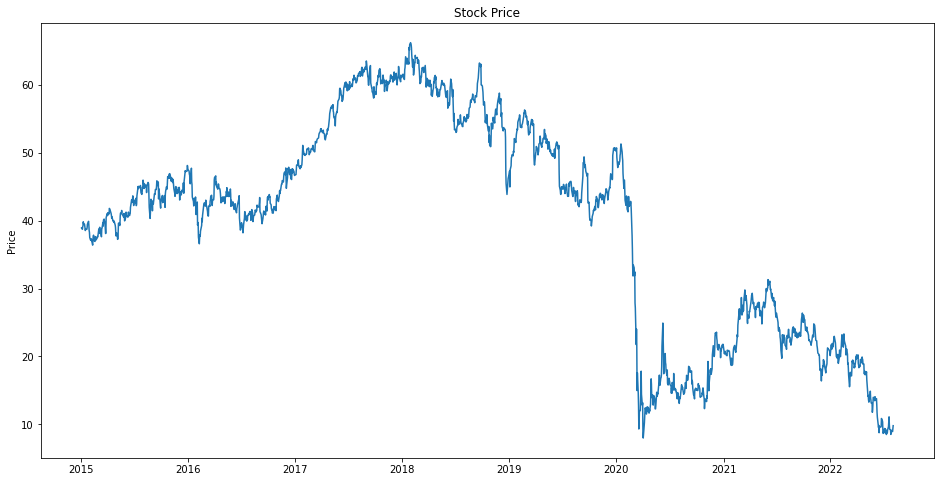

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [8]:
df = df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1905,2022-07-28,8.97,9.38,8.57,9.10,9.10,58406700
1906,2022-07-29,9.01,9.18,8.77,9.06,9.06,40811300
1907,2022-08-01,8.90,8.98,8.57,8.92,8.92,54740900
1908,2022-08-02,8.77,9.64,8.67,9.35,9.35,56616000
1909,2022-08-03,9.50,9.81,9.47,9.79,9.79,45506500


In [9]:
df2 = df.resample('M', on='Date').mean()

In [10]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,46.003500,46.294000,45.371000,45.734500,39.022137,4.355200e+06
2015-02-28,43.681579,43.907895,43.344211,43.615790,37.305577,4.749926e+06
2015-03-31,45.413636,45.928182,45.090909,45.593637,39.127913,5.003695e+06
2015-04-30,47.146667,47.394762,46.641428,46.950476,40.292338,3.564076e+06
2015-05-31,46.320000,46.655500,46.024000,46.299000,39.806896,3.025845e+06


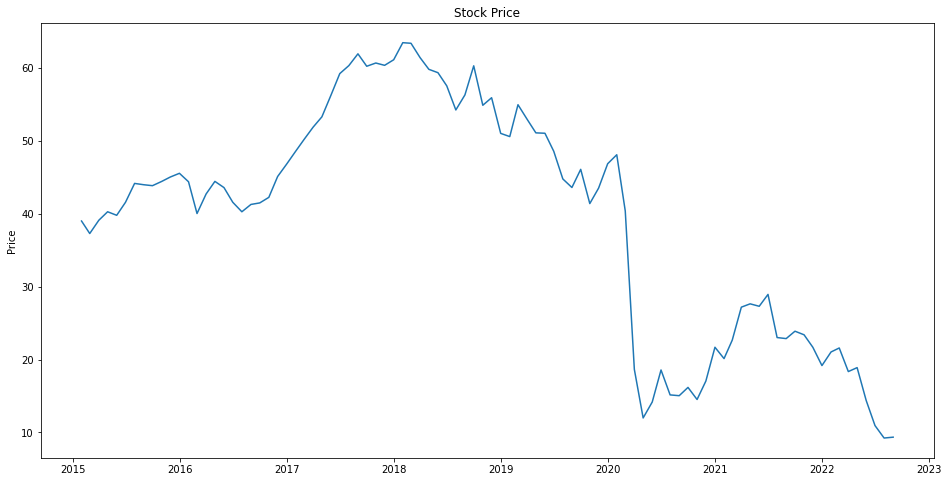

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df2['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [12]:
df2  = df2.reset_index()
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
87,2022-04-30,19.140500,19.466000,18.591500,18.899000,18.899000,3.212324e+07
88,2022-05-31,14.547143,14.909048,13.973333,14.384286,14.384286,4.150228e+07
89,2022-06-30,11.055238,11.362381,10.615238,10.945238,10.945238,5.560137e+07
90,2022-07-31,9.144500,9.485500,8.876500,9.234500,9.234500,6.141512e+07
91,2022-08-31,9.056667,9.476667,8.903333,9.353333,9.353333,5.228780e+07


In [13]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(df2[:-12] , 'Date' , 'Adj Close', 12);
    lEngine.getModelInfo();
    return lEngine

In [14]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Adj Close'], 'Transformations': [('Adj Close', 'None', '_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': '_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'CumSum_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'Diff_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'RelDiff_Adj Close'}))
/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Se

INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['Adj Close'], 'Transformations': [('Adj Close', [('Adj Close', 'None', 'CumSum_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'Adj Close', 'Transformations': [('Adj Close', 'None', 'CumSum_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.01, ('MODEL_SELECTION', {'Signal': 'Adj Close', 'Transformations': [('Adj Close', 'None', 'CumSum_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_START', ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'Adj Close', 'Model': '_Adj Close_Lag1Trend_residue_zeroCycle[0.0]_resi

CROSS_VAL_PERF                                               Category  ForecastMAPE
0                      NoTransf_Lag1Trend_Cycle_5_NoAR        0.2044
1                        NoTransf_Lag1Trend_Cycle_5_AR        0.2048
2          Difference_Lag1Trend_Seasonal_DayOfMonth_AR        0.2103
3                      NoTransf_Lag1Trend_NoCycle_NoAR        0.2115
4                Integration_Lag1Trend_Cycle_None_NoAR        0.2115
..                                                 ...           ...
131  Integration_ConstantTrend_Seasonal_DayOfNthWee...       11.2142
132  Integration_ConstantTrend_Seasonal_DayOfNthWee...       11.2328
133    Integration_ConstantTrend_Seasonal_DayOfWeek_AR       12.5354
134  Integration_ConstantTrend_Seasonal_WeekOfYear_...       30.5183
135   Integration_ConstantTrend_Seasonal_WeekOfYear_AR       30.7569

[136 rows x 2 columns]


INFO:pyaf.std:TREND_DETAIL '_Adj Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Adj Close_Lag1Trend_residue_zeroCycle[0.0]' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Adj Close_Lag1Trend_residue_zeroCycle[0.0]_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0337 MAPE_Forecast=0.2115 MAPE_Test=0.1042
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0337 SMAPE_Forecast=0.1723 SMAPE_Test=0.1063
INFO:pyaf.std:MODEL_MASE MASE_Fit=0.9815 MASE_Forecast=0.9861 MASE_Test=0.9568
INFO:pyaf.std:MODEL_CRPS CRPS_Fit=2.3645 CRPS_Forecast=3.9222 CRPS_Test=1.5112
INFO:pyaf.std:MODEL_L1 L1_Fit=1.681 L1_Forecast=4.6508 L1_Test=2.2558
INFO:pyaf.std:MODEL_L2 L2_Fit=2.1003 L2_Forecast=6.938 L2_Test=2.8775
INFO:pyaf.std:MODEL_LnQ LnQ_Fit=0.094 LnQ_Forecast=0.9962 LnQ_Test=0.2096
INFO:pyaf.std:MODEL_MEDIAN_AE MedAE_Fit=1.6562 MedAE_Forecast=3.3846 MedAE_Test=1.6437
INFO:pyaf.std:MODEL_COMPLEXITY 2.0
INFO:pyaf.std:SIGNAL_TRANSFORMATION_DETAIL_START
INFO:pyaf.std:SIGNAL_TRANSFORMATION_MODEL_VALUES NoTran

CROSS_VAL_PERF                                               Category  ForecastMAPE
0                      NoTransf_Lag1Trend_Cycle_5_NoAR        0.2044
1                        NoTransf_Lag1Trend_Cycle_5_AR        0.2048
2          Difference_Lag1Trend_Seasonal_DayOfMonth_AR        0.2103
3                      NoTransf_Lag1Trend_NoCycle_NoAR        0.2115
4                Integration_Lag1Trend_Cycle_None_NoAR        0.2115
..                                                 ...           ...
131  Integration_ConstantTrend_Seasonal_DayOfNthWee...       11.2142
132  Integration_ConstantTrend_Seasonal_DayOfNthWee...       11.2328
133    Integration_ConstantTrend_Seasonal_DayOfWeek_AR       12.5354
134  Integration_ConstantTrend_Seasonal_WeekOfYear_...       30.5183
135   Integration_ConstantTrend_Seasonal_WeekOfYear_AR       30.7569

[136 rows x 2 columns]


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.183, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Adj Close'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.231, ('FINALIZE_TRAINING', {'Signals': ['Adj Close'], 'Transformations': [('Adj Close', [('Adj Close', 'None', 'CumSum_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2015-01-31T00:00:00.000000 TimeMax=2019-06-30T00:00:00.000000 TimeDelta=<DateOffset: days=30> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Adj Close' Length=80  Min=11.99 Max=63.500913  Mean=42.851931 StdDev=14.174591
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Adj Close' Min=0.0 Max=1.0  Mean=0.599134 StdDev=0.275176
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Adj Close_Lag1Trend_residue_zeroCycle[0.0

In [15]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(df2, 12)
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(df2, 12)
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(df2, 12)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.124, ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.108, ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.111, ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 12}))


<AxesSubplot:xlabel='Date'>

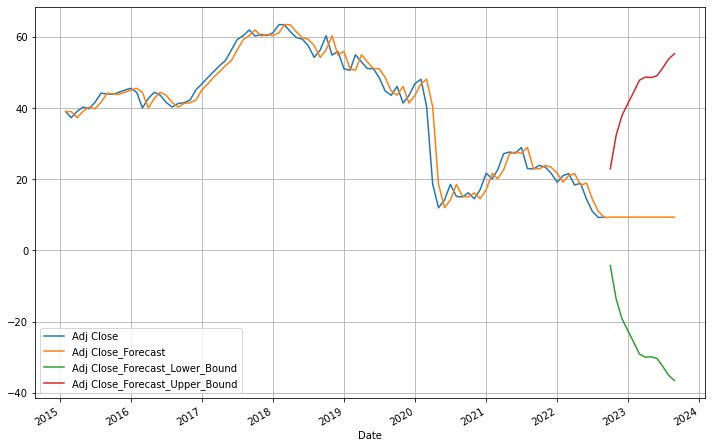

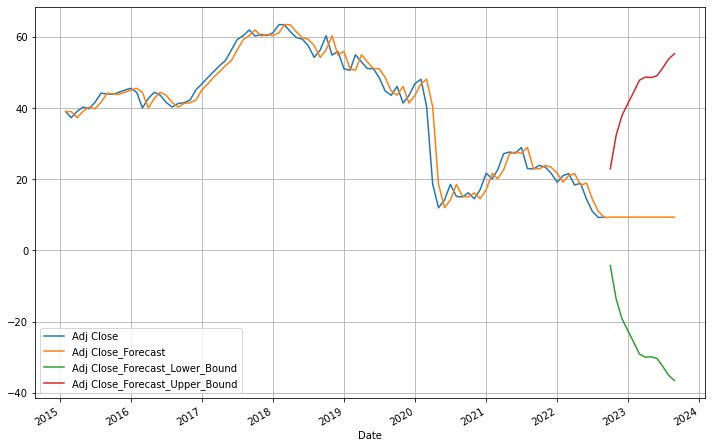

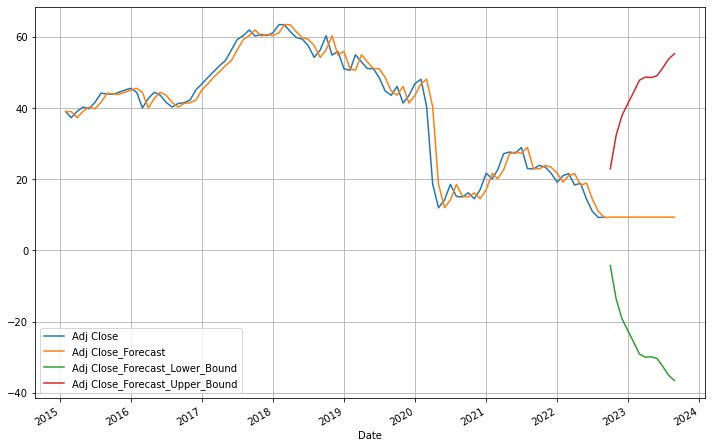

In [16]:
model_no_cross_valid_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))